In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.Age.fillna(data.Age.mean(),inplace=True)
data.dropna(inplace=True)
missing=data.isna().sum()
print(missing)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [ ]:
data.Fare.mean()

76.10330099009902

In [ ]:
label_en=LabelEncoder()
data["Sex"]=label_en.fit_transform(data["Sex"])
data["Embarked"]=label_en.fit_transform(data["Embarked"])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,2


In [ ]:
data=data.drop('Cabin',axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,2
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,2


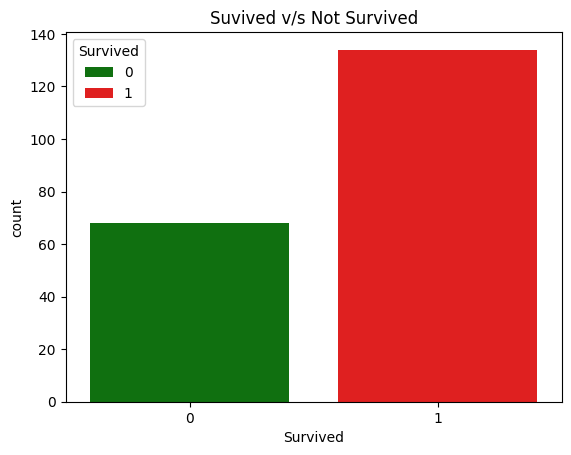

In [ ]:
sns.countplot(data=data, x='Survived',hue='Survived',palette=['green', 'red'])

plt.title('Suvived v/s Not Survived')
plt.show()

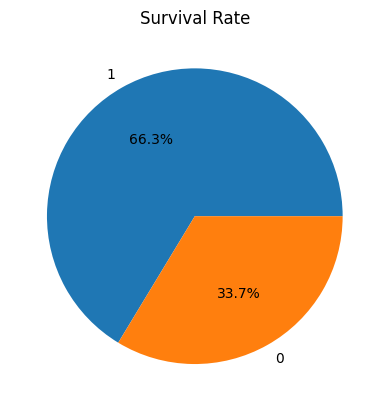

In [ ]:
# Plot of Survival Rate
def plot_survival_rate(df):
    fig, ax = plt.subplots()
    ax.pie(df['Survived'].value_counts(), labels=df['Survived'].value_counts().index, autopct='%1.1f%%')
    ax.set_title('Survival Rate')
    plt.show()

plot_survival_rate(data)

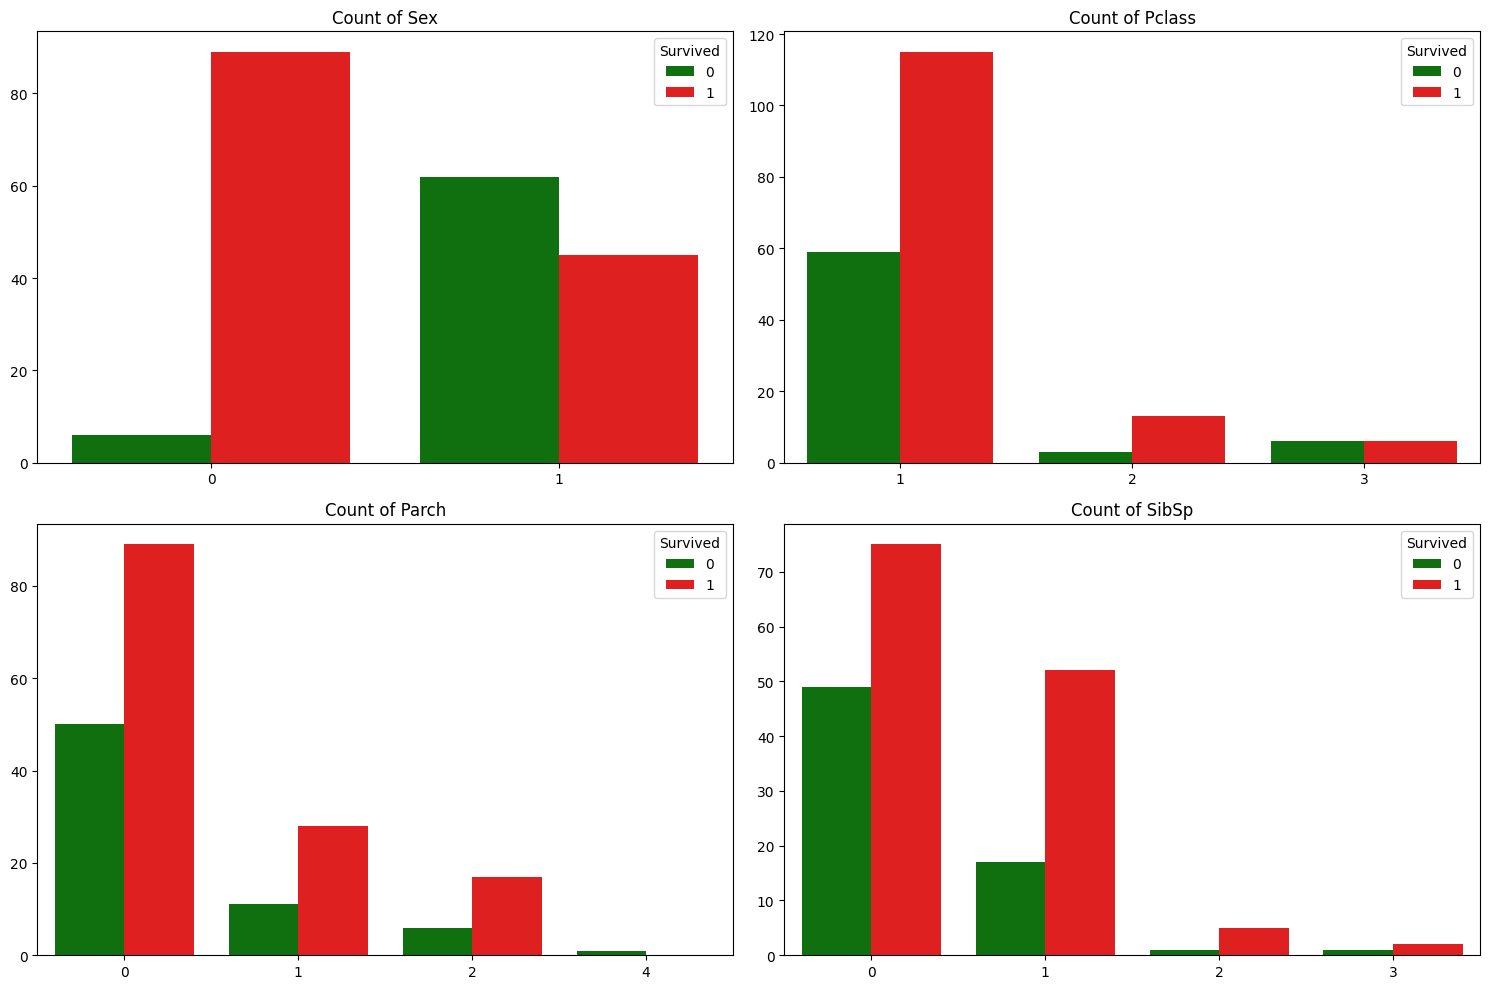

In [ ]:
cat_cols = ['Sex', 'Pclass', 'Parch', 'SibSp']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for feature, ax in zip(cat_cols, axes.flatten()):
    sns.countplot(data=data, x=feature, hue='Survived', palette=['green', 'red'],ax=ax)
    ax.set_title(f'Count of {feature}')
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show();


<Axes: xlabel='Survived', ylabel='Fare'>

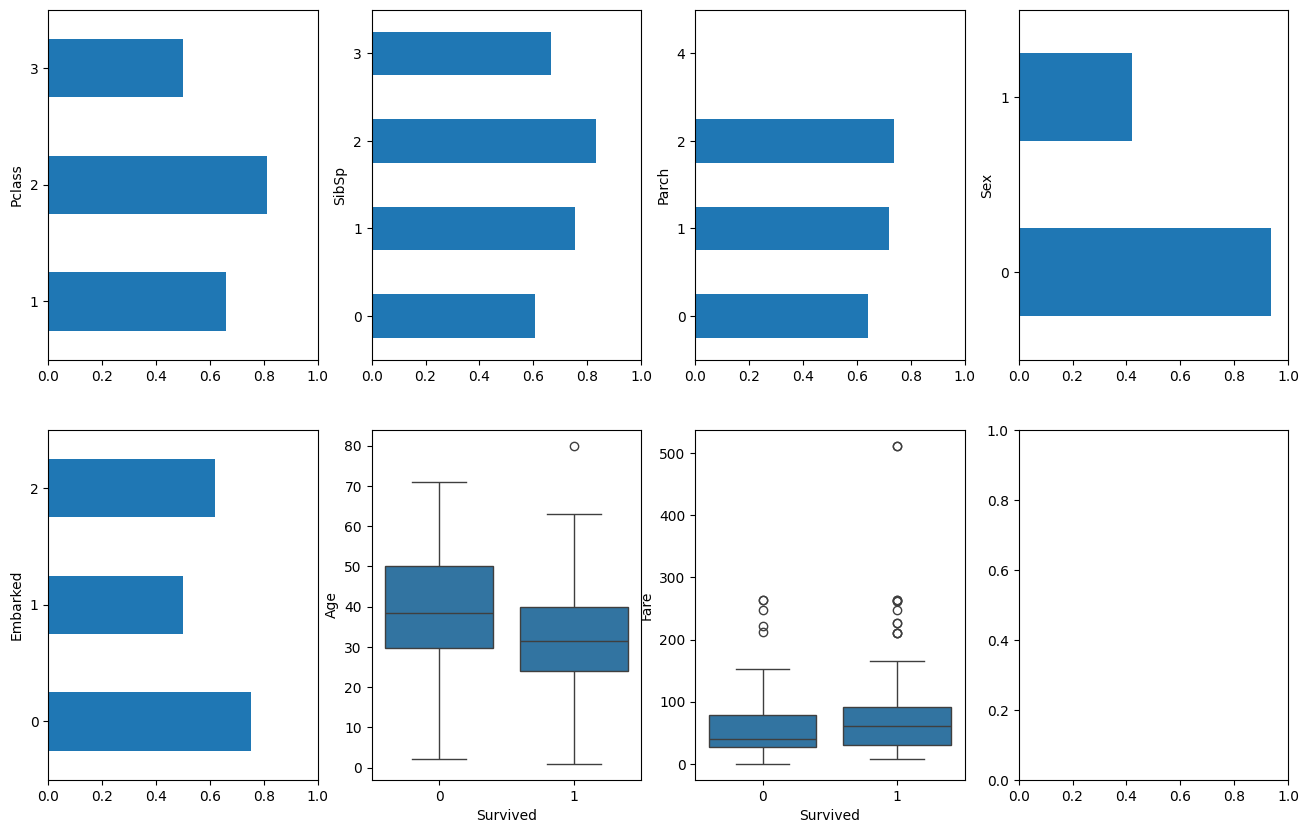

In [ ]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
data.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
data.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
data.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
data.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
data.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=data,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=data,ax=axesbi[1,2])